# 상견례 게시물 WordCloud 분석

In [25]:
import yaml
import pandas
import wordcloud
from kiwipiepy import Kiwi
import matplotlib.pyplot as plt
from ko_ww_stopwords.stop_words import ko_ww_stop_words

In [26]:
yaml_path = '../config/worldcloud.yaml'
with open(yaml_path, 'r') as f:
    config = yaml.safe_load(f)
    font_path = config['font_path']
    data_path, encoding = config['data_path'], config['encoding']
    custom_stop_words = set(config['custom_stop_words'])
    figure_width, figure_height, figure_background, figure_title = config['figure_width'], config['figure_height'], config['figure_background'], config['figure_title']

## 1. 데이터 로드 및 전처리

In [27]:
blind_posts_df = pandas.read_csv(data_path, encoding=encoding)
blind_comments_df = blind_posts_df['comments_all'].str.split(' \|\| ').explode().to_frame(name='comments')
print(blind_comments_df)

ko_ww_stop_words = ko_ww_stop_words | custom_stop_words
print(ko_ww_stop_words)

                                              comments
0    저도 저번달에 남친 부모님 첫인사드렸는데 꽃다발+한우선물세트 드리니 어머님이 특히 ...
1    모수는 나도 우리나라에서 최고라고 생각하긴하는데 2스타들이랑 압도적인 격차까진 아니...
1    222 최현석 방송에 자주 나왔던 바람에 너무 거품 심하게 껴있어서 흑백요리사 보며...
1    최현석도 호불호가 갈리니 음식도 음식이지만 오히려 매장 경영능력이나 마케팅으로 승부...
1                           어째 쵸이닷 가본 사람들 평은 하나같이 일관되지
..                                                 ...
159  거울못 식당~~ 코스로 나와서 좋았어 ㅎㅎㅎ 설명도 중간중간 해줘서 덜 어색하고 파...
159     오오!! 안그래두 여기도 생각중이었는데!! 소중한 정보 감사합니다🙇🏻‍♀️🙇🏻‍♀️
159                       기와 너무 맛없었어용 ㅠㅠ 룸이 따로 있는건 좋지만
159              시화담. 코스인데 설명도 해주시고 요리하나하나가 시와 그림 같았음.
159                      [로켓프레시] 고급진 인생맛집 칼집돼지 왕구이 2개입

[1196 rows x 1 columns]
{'같이', '결정', '한다', '둘', '조건', '틈타', '어때', '그것들', '여섯', '진짜로', '글', '식당', '이겨', '자기', '위해서', '어떤', '그런', '우선', '마터면', '때문에', '오', '마음', '또', '뭐', '얼마만큼', '채로', '앞', '때', '형', '몇', '여기', '정도', '헉', '참', '그까짓', '가족', '때문', '함께', '일', '즉시', '즉', '제', '스물', '번', '실로', '어이', '명', '듯', "돈'", '어떤것', '본인', '이곳', '어머니', '점'

## 2. 불용어 제거

In [28]:
kiwi = Kiwi()
blind_comments_df['comments_noun_only'] = blind_comments_df['comments']\
    .fillna('')\
    .astype(str)\
    .apply(lambda comment:[t.form for t in kiwi.tokenize(comment) if t.tag.startswith('N') and t.form not in ko_ww_stop_words])
print(blind_comments_df['comments_noun_only'])

Quantization is not supported for ArchType::neon. Fall back to non-quantized model.


0      [저번, 달, 인사, 꽃다발, 한우, 선물, 세트, 어머님, 마장동, 부장, 고기,...
1      [나라, 최고, 스타, 압도, 격차, 반, 걸음, 가이세키, 포, 코스, 관점, 완...
1                  [최현, 석, 방송, 바람, 거품, 흑백, 요리사, 최현석, 극찬]
1          [최현, 석, 호불호, 음식, 음식, 매장, 경영, 능력, 마케팅, 승부, 부분]
1                                           [쵸이닷, 평, 일관]
                             ...                        
159                      [거울, 코스, 설명, 중간중간, 파인, 다이닝, 느낌]
159                                                 [정보]
159                                              [기와, 룸]
159                        [시화, 코스, 설명, 요리, 하나하나, 시, 그림]
159                      [고급, 인생, 맛집, 칼집, 돼지, 왕, 구이, 개입]
Name: comments_noun_only, Length: 1196, dtype: object


## 3. WordCloud 시각화

In [29]:
positive_words_for_wc = " ".join(\
    blind_comments_df['comments_noun_only']\
    .explode()\
    .dropna()\
    .astype(str)\
)

positive_wc = wordcloud.WordCloud(
    font_path=font_path,
    width=figure_width, height=figure_height,
    background_color=figure_background
).generate(positive_words_for_wc)

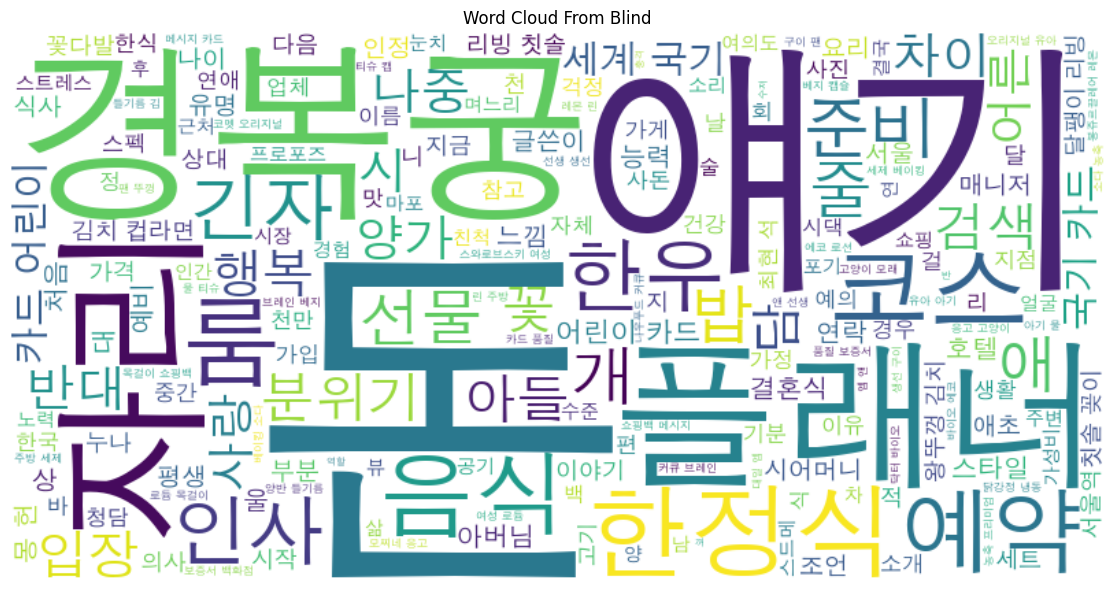

In [30]:

plt.figure(figsize=(12, 6))

plt.imshow(positive_wc, interpolation="bilinear")
plt.axis("off")
plt.title(figure_title)

plt.tight_layout()
plt.show()